In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pmd


/Users/gabrielasoares/.local/share/virtualenvs/ex4-Ksy_QwV-/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Exercise
1- Look at sensor data that tracks atmospheric $CO_2$ from continuous air samples at Mauna Loa Observatory in Hawaii. This data includes $CO_2$ samples from March 1958 to December 1980.
- Determine the presence of main trend and seasonality in the data
- Determine if the data are stationary
- Split the data in train (90%) and test (10%)
- Find a set of SARIMAX coordinate models by looking at the ACF and PACF plots.
- Perform a grid search on the model candidates.
- Select the best models, based on performance metrics, model complexity, and normality of the residuals.
- Compare the best model you found with the one from autoarima.

In [5]:
co2 = pd.read_csv('https://zenodo.org/records/10951538/files/arima_co2.csv?download=1',
                  header = 0,
                  names = ['idx', 'co2'],
                  skipfooter = 2,
                  engine='python')

# convert the column idx into a datetime object and set it as the index
co2['idx'] = pd.to_datetime(co2['idx'])
co2.set_index('idx', inplace=True)

# Rmove the name "idx" from the index column
co2.index.name = None
co2

,co2
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17
...,...
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63
1980-11-01,337.74


* Tendência crescente
* Sazonalidade anual

<Axes: >

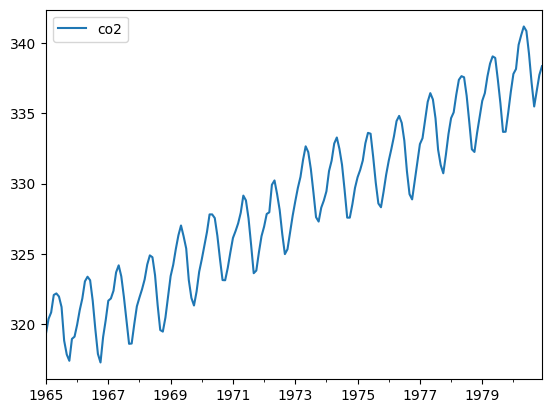

In [6]:
co2.plot()

In [7]:
dcmp = sm.tsa.STL(co2, seasonal=13, period=12).fit()

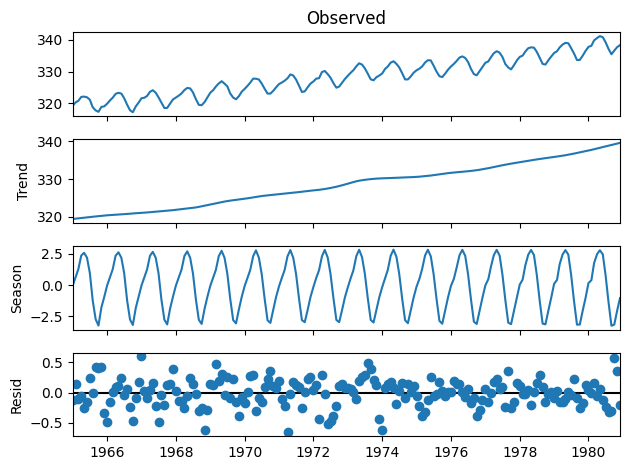

In [9]:
dcmp.plot();

É estacionaria?
* Tem tendência acentuada --> não estacionária
* Tem sazonalidade
* Pelo teste kpss não é estacionária

In [10]:
sm.tsa.stattools.kpss(co2, nlags='auto')

/var/folders/72/x6_kg98117nd5xkqbx_bl3dc0000gn/T/ipykernel_45900/1581775012.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  sm.tsa.stattools.kpss(co2, nlags='auto')


(1.9852615080853047,
 0.01,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Dividir em treino (90%) e teste (10%)

In [18]:
ts_size = len(co2)
train_size = int(np.round(0.9*ts_size))
train = co2[:train_size]
test = co2[train_size:]

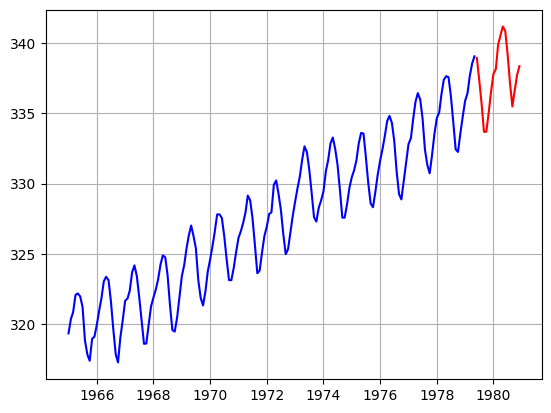

In [24]:
plt.plot(train, "b", label="train")
plt.plot(test, "r", label="test")
plt.grid(True)

In [33]:
diff2 = co2.diff(12).diff()
sm.tsa.stattools.kpss(diff2.dropna(), nlags='auto')

/var/folders/72/x6_kg98117nd5xkqbx_bl3dc0000gn/T/ipykernel_45900/1103196873.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.stattools.kpss(diff2.dropna(), nlags='auto')


(0.056527407019530414,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [36]:
ndiffs, nsdiffs = pmd.arima.ndiffs, pmd.arima.nsdiffs
ndiffs(co2), nsdiffs(co2, 12)

/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warning

(1, 1)

* Find a set of SARIMAX coordinate models by looking at the ACF and PACF plots.

ARIMA
p, d, q
2 1 2
SARIMA
P, D, Q
   1

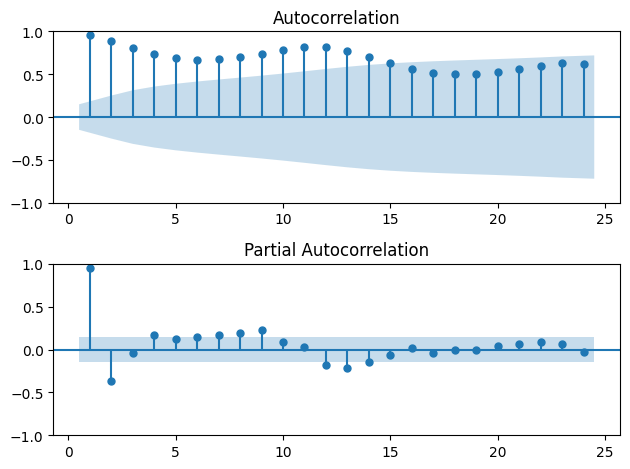

In [25]:
fig, axs = plt.subplots(2)
lags = np.r_[1:25]
sm.graphics.tsa.plot_acf(train, lags=lags, ax=axs[0]);
sm.graphics.tsa.plot_pacf(train, lags=lags, ax=axs[1]);
plt.tight_layout()

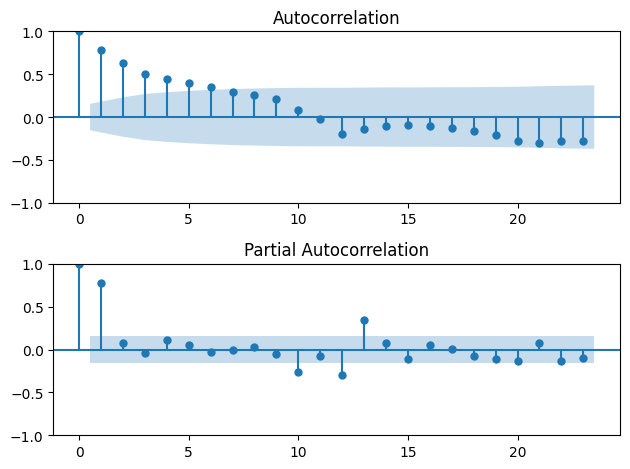

In [42]:
fig, axs = plt.subplots(2)
#lags = np.r_[1:25]
sm.graphics.tsa.plot_acf(train.diff(12).dropna(), ax=axs[0]);
sm.graphics.tsa.plot_pacf(train.diff(12).dropna(), ax=axs[1]);
plt.tight_layout()

- Perform a grid search on the model candidates.

ARIMA(p, d, q)



In [ ]:
p = np.arange(1, 4)
d = 1
q = np.arange(1, 4)

# iterar combinações de p, d e q e avaliar o resultado do arima usando AIC


In [62]:
from tqdm import tqdm
import warnings
import itertools
results = []
p, d, q = 2, 1, 2
for (d, p, q) in tqdm(list(itertools.product(range(2), range(3), range(3)))):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fit = sm.tsa.SARIMAX(np.log(train), order=(p,d,q)).fit()
        result = dict(p=p, d=d, q=q,
                      label=f'ARIMA({p}{d}{q})',
                      AIC=fit.aic, fit=fit)
    results.append(result)
results = pd.DataFrame(results)

  0%|                                                                                                                                                                                                            | 0/18 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 17%|████████████████████████████████▋                                                                                                                                                                   | 3/18 [00:00<00:00, 20.00it/s] This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17529D+00    |proj g|=  2.98206D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.982D-07   3.175D+00
  F =   3.1752887108367900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 28%|██████████████████████████████████████████████████████▍                                                                                                                                             | 5/18 [00:00<00:00, 17.08it/s] This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.32325D+00    |proj g|=  6.03486D-01
  ys=-2.528E+00  -gs= 1.109E+00 BFGS update SKIPPED

At iterate   15    f= -1.69194D+00    |proj g|=  1.28360D+00

At iterate   20    f= -2.90967D+00    |proj g|=  4.68893D+01

At iterate   25    f= -3.77565D+00    |proj g|=  6.16834D+01

At iterate   30    f= -3.91574D+00    |proj g|=  4.29064D+00

At iterate   35    f= -3.93320D+00    |proj g|=  1.56503D+00

At iterate   40    f= -3.93376D+00    |proj g|=  5.71027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     83      1     1     0   2.049D-03  -3.934D+00
  F =  -3.9337557888106423     

 39%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                       | 7/18 [00:00<00:00, 14.22it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f= -3.56995D+00    |proj g|=  2.40064D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     77      1     0     0   7.318D-01  -3.570D+00
  F =  -3.5701704858224836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26876D+06    |proj g|=  1.14543D+09

At iterate    5    f=  1.63373D+00    |proj g|=  1.10335D+00
  ys=-8.067E+00  -gs= 1.233E+00 BFGS update SKIPPED

At iterate   10  

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                  | 9/18 [00:00<00:00, 11.32it/s] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
       


At iterate   15    f= -3.17911D+00    |proj g|=  8.56638D+01

At iterate   20    f= -4.24496D+00    |proj g|=  1.14438D+01

At iterate   25    f= -4.26666D+00    |proj g|=  1.37088D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     61      1     1     0   1.371D-01  -4.267D+00
  F =  -4.2666619109679251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.21507D+00    |proj g|=  8.36575D-01

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 17/18 [00:00<00:00, 20.31it/s] This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.66511D+00    |proj g|=  4.62891D+00
  ys=-7.253E-11  -gs= 1.508E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     74      2     1     0   7.445D-01  -4.665D+00
  F =  -4.6651151405237830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables a

In [63]:
results = pd.DataFrame(results)
results

,p,d,q,label,AIC,fit
0,0,0,0,ARIMA(000),1100.649894,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
1,0,0,1,ARIMA(001),868.980722,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
2,0,0,2,ARIMA(002),641.423612,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
3,1,0,0,ARIMA(100),-1448.065037,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
4,1,0,1,ARIMA(101),-1355.079503,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
5,1,0,2,ARIMA(102),-1547.878400,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
6,2,0,0,ARIMA(200),-1229.278988,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
7,2,0,1,ARIMA(201),-1435.339222,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
8,2,0,2,ARIMA(202),-1466.265021,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
9,0,1,0,ARIMA(010),-1456.417780,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


In [64]:
results.sort_values(by='AIC')#['fit'][6].fittedvalues

,p,d,q,label,AIC,fit
16,2,1,1,ARIMA(211),-1638.613777,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
17,2,1,2,ARIMA(212),-1623.973254,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
15,2,1,0,ARIMA(210),-1608.129839,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
11,0,1,2,ARIMA(012),-1593.375539,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
13,1,1,1,ARIMA(111),-1587.650548,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
14,1,1,2,ARIMA(112),-1586.946693,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
12,1,1,0,ARIMA(110),-1570.489848,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
5,1,0,2,ARIMA(102),-1547.878400,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
10,0,1,1,ARIMA(011),-1505.938358,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
8,2,0,2,ARIMA(202),-1466.265021,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


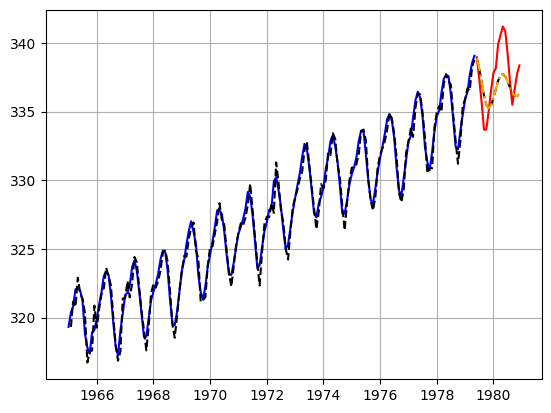

In [101]:
forecast = np.exp(results['fit'][16].forecast(19))
sforecast = np.exp(fit.forecast(19))
plt.plot(train, "b", label="train")
plt.plot(test, "r", label="test")
plt.plot(np.exp(results['fit'][16].fittedvalues[1:]), "k", linestyle='--', label='arima')
plt.plot(forecast, "k", linestyle='--', label='arima')
plt.plot(forecast, "orange", linestyle='-.', label='sarima')
plt.grid(True)


In [96]:
fit = sm.tsa.SARIMAX(np.log(train), order=(2,1,1), seasonal_order=(2,1,1,12)).fit()

/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible startin

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.01109D+00    |proj g|=  2.32058D+02

At iterate    5    f= -5.03777D+00    |proj g|=  5.18015D+00
  ys=-7.541E-08  -gs= 1.138E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.467E-08  -gs= 1.109E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    122      3     2     0   8.250D+00  -5.038D+00
  F =  -5.0377882545911046     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
fit.fittedvalues

1965-01-01    0.000000
1965-02-01    5.766194
1965-03-01    5.769445
1965-04-01    5.770880
1965-05-01    5.774738
                ...   
1979-01-01    5.816918
1979-02-01    5.818360
1979-03-01    5.821934
1979-04-01    5.825464
1979-05-01    5.826079
Length: 173, dtype: float64

In [76]:
t_df = train[1:].copy()
fitted_df = np.exp(results['fit'][16].fittedvalues[1:]).copy()

In [82]:
fitted_d

0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

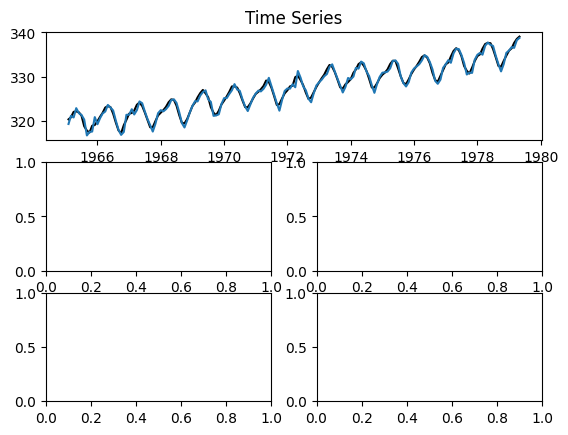

In [85]:
plot_tsresiduals(t_df, fitted_df , acf_lags=np.r_[1:26])

In [ ]:
results

In [55]:
fit_auto = pmd.auto_arima(
    train,
    seasonal=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True
)

/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warning

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=535.598, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=422.112, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=438.474, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=535.348, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=383.493, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=365.570, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=367.196, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec


/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=365.025, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=382.369, Time=0.01 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=366.766, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=343.379, Time=0.03 sec


/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warning

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=341.673, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=402.819, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=343.359, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=420.537, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=387.200, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=344.802, Time=0.05 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 0.818 seconds


/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielasoares/.local/share/virtualenvs/times_series-ymuiMkMa/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warning